# Project 5a - Population Dynamics: the Lotka-Volterra Equations

We have spent much of the semester considering physics - in particular motion of Newtonian particles under different forces and scenarios.  However, the framework that we've developed can be used for many other situations of scientific interest as well.  Here we turn to a major class of simulations that have been especially relevant over the course of the past few years: population dynamics. 

Such models are used in a variety of areas, and we will explore three over the course of this unit.  First, we will begin with a classic example from ecology.  This model was inspired by the following chart, which shows the total number of lynx and hare pelts collected by the Hudson's Bay Company between 1845 and 1935.  
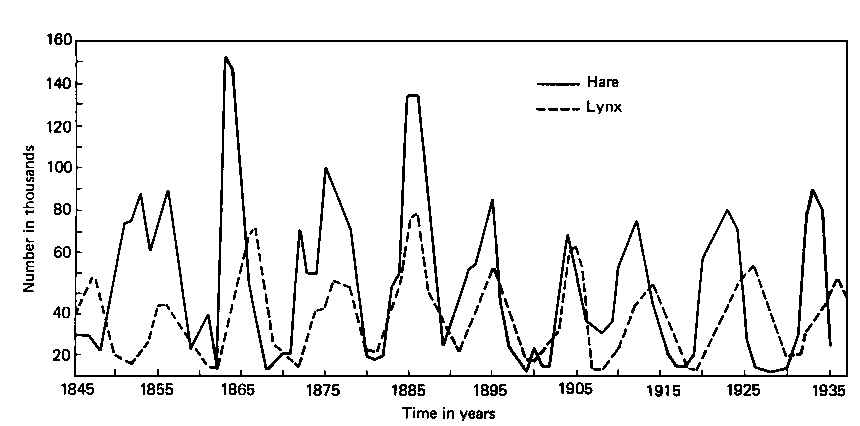
A few interesting things to consider about this plot.  First, both species experience cycles, similar to the oscillations that we've seen in planets, springs, and molecules.  Second, the cycles appear to be lagged: the peak number of hares preceds the peak number of lynx.  Third, *the cycles are not annual*.  It would be easy to attribute this to seasonal changes, but that is not the case.  So what's going on here?  

In an effort to explain these patterns, Lotka and Volterra both proposed the following model of dynamics.  Let's say that we have two populations of animals called $h$ and $l$ for hares and lynx.  Hares are subject to two processes.  First, they reproduce proportionally to the population size.  As such, in the absence of lynx (and in the absence of any other environmental limiters), we can write an approximate equation
$$
\frac{\partial h}{\partial t} = \alpha h,
$$
where $\alpha$ is a parameter that describes the birth rate minus the death rate of hares (per hare).  Of course this is a funny thing to write because we're dealing with discrete animals, but it's helpful to work in this slightly artifical paradigm in which we allow fractional hares.  This approximation becomes better as the number of hares increases.  

If we model this equation directly, we'll see that it has a pretty uninteresting solution
$$h(t) = h_0 \mathrm{e}^{\alpha t}.$$
This is the opposite of the coffee cup: rather than exponential decay, we have exponential growth without limit.  Fortunately, to avoid a world overrun by bunnies, we have lynx to keep the population in check.  In particular, we hypothesize that the number of bunnies eaten by lynx is proportional to the frequency of their interactions, which in turn is proportional to both of their population sizes.  A simple interaction term can thus be added to the hare dynamics as 
$$
\frac{\partial h}{\partial t} = \alpha h - \beta h l.
$$
Of course we also need to know the lynx population which might vary as well.  We'll assume that lynx reproduce proportionally to their food supply, which is to say that they convert rabbits into lynx.  Lynx also die of natural causes at a rate proportional to their population.  Combining these two ideas we have
$$
\frac{\partial l}{\partial t} = \gamma h l - \delta l.
$$
These two ODEs above are the Lotka-Volterra equations.  

### Model implementation

**Create a Lotka-Volterra problem class as before.  This should be very simple relative to what you've been working on recently.  Use as an initial condition 100 hares and 20 lynx.  Choose $\alpha=0.1,\beta=0.01,\gamma=0.002,\delta=0.1$.  (This roughly corresponds to highly effective but slowly reproducing lynx).  Integrate the equations for long enough to get a complete sense of the system's dynamics using a second-order Runge-Kutta method (either the [midpoint method](https://en.wikipedia.org/wiki/Midpoint_method) or [Heun's method](https://en.wikipedia.org/wiki/Heun%27s_method)).  Describe the qualitative aspects of the system's dynamics.  Explore different parameters and initial conditions and try to proved a quantitative explanation for why these perhaps surprising dynamics occur.**


In [2]:
class RK2:
    def __init__(self):
        pass   
    
    def step(self,ode,t,dt,u_0):
        # Do some stuff here
        k1 = ode.rhs(t, u_0)
        k2 = ode.rhs(t + dt, u_0 + dt*k1)
        return u_0 + (dt/2)*(k1 + k2)

In [3]:
class Integrator:
    def __init__(self,ode, method):
        self.ode = ode #specifies 1d or 2d
        self.method = method #euler, rk2, rk4
        
    def integrate(self,interval,dt,u_0):
        t_0 = interval[0] 
        t_end = interval[1]
        
        times = [t_0]
        states = [u_0]
        
        t = t_0
        while t<t_end:
            dt_ = min(dt,t_end-t) #picks the smallest of dt and interval length
            u_1 = self.method.step(self.ode,t,dt_,u_0) #gets next position
            t = t + dt_ #increases time interval by dt
            u_0 = u_1 #old position is now new position
            
            times.append(t)
            states.append(u_1)
            
        return np.array(times),np.array(states)

In [4]:
class LoktaVolterra():
    def __init__(self):
        self.alpha = 0.1
        self.beta = 0.01
        self.gamma = 0.002 # y
        self.delta = 0.1 # 8
    def rhs(self, t, u):
        h = u[0]
        l = u[1]
        dh_dt = self.alpha*h - self.beta*h*l
        dl_dt = self.gamma*h*l - self.delta*l
        return np.array([dh_dt, dl_dt])


In [5]:
import numpy as np

method = RK2()
ode = LoktaVolterra()
integrator = Integrator(ode, method)

h = 100.
l = 20.
t_0 = 0.0
t_end = 1000.0
dt = 0.1
t,u = integrator.integrate([t_0,t_end],dt,np.array([h,l]))

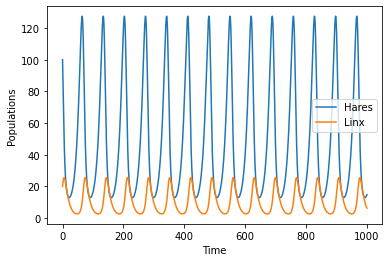

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t,u[:,0], label='Hares')
plt.plot(t,u[:,1], label='Linx')
plt.xlabel('Time')
plt.ylabel('Populations')
plt.legend()
plt.show()


### Phase plots

One nice way of understanding potential stable points of oscillatory systems is to produce a phase portrait, which in this case means a 2D plot (hares on the x-axis, lynx on the y-axis) of multiple solutions for different initial conditions.  **Using the same parameters as in the previous section, make a phase portrait.  For initial conditions, I started with 100 hares and $c$ lynx with $c\in\{10,20,30,40,50,60,70,80,90,100\}$.  Using this figure, try to determine the fixed point (i.e. the number of hares and lynx that are in exact balance and do not change in time).**  You can also determine this fixed point analytically by setting the time derivatives of the Lotka-Volterra equations to zero and solving for $h$ and $l$.  **Solve for the fixed point and put this on the phase plot as well**.


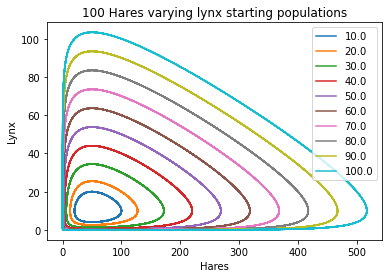

In [24]:
import matplotlib.pyplot as plt
h = 100.
l = 10.
l_array = [10., 20., 30., 40., 50., 60., 70., 80., 90., 100.]
t_0 = 0.0
t_end = 1000.0
dt = 0.1
for l_value in l_array:
    t,u = integrator.integrate([t_0,t_end],dt,np.array([h,l_value]))

    plt.plot(u[:,0], u[:,1], label=str(l_value))
plt.title('100 Hares varying lynx starting populations')
plt.xlabel('Hares')
plt.ylabel('Lynx')
plt.legend()
plt.show()


### Carrying capacity
The Lotka-Volterra equations are often not quite realistic for real applications because they assume that hares grow without bound in the absence of Lynx.  In reality, an environment can only support so many animals before it reaches its [carrying capacity](https://en.wikipedia.org/wiki/Carrying_capacity).  We can amend our model of hare growth (ignoring lynx for now) by instead considering the model
$$
\frac{\partial h}{\partial t} = \alpha h \left(1 - \frac{h}{K}\right),
$$
where $K$ is the system's carrying capacity.  This simple ODE has the analytical solution
$$
h(t) = \frac{K}{1 + \left(\frac{K}{h_0} - 1\right)e^{-\alpha t}},
$$
where $h_0$ is the initial number of hares.  **Plot this solutions as a function of time for some reasonable initial conditions, a carrying capacity of $K=100$ and $\alpha$ as above.  Students who have taken Machine Learning (especially grad students), what shape is this curve?**

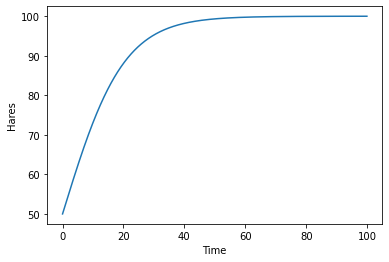

In [56]:
# Incorrect, graph is flat
hare_pops = []
h_0 = 50.
l = 10.
K_value = 100.
alpha = 0.1
t = []
dt = 0.1
t_end = 100.
length = int(t_end / dt)

for i in range(length):
    current_time = dt * i
    t.append(current_time)
    rhs = K_value / (1 + ((K_value/h_0) - 1) * np.exp(-alpha*current_time)) 
    hare_pops.append(rhs)

plt.plot(t, hare_pops)
plt.xlabel('Time')
plt.ylabel('Hares')
plt.show()

Finally, let's see how this change affects the hare-lynx dynamics.  Create a new Lotka-Volterra With Carrying Capacity problem class, in which the hare equation has been replaced with 
$$
\frac{\partial h}{\partial t} = \alpha h \left(1 - \frac{h}{K}\right) - \beta h l
$$
**Perform the same experiments as above (plot solutions through time and also make phase portraits), with this new equation.  How do the dynamics of the system change?  What does this tell you about systems that exhibit periodicity between predator-prey populations versus those that don't?**  

In [51]:
class LoktaVolterra():
    def __init__(self, K_value):
        self. alpha = 0.1
        self.beta = 0.01
        self.gamma = 0.002 # y
        self.delta = 0.1 # 8
        self.K = K_value
    def rhs(self, t, u):
        h = u[0]
        l = u[1]
        dh_dt = self.alpha*h * (1 - (h/self.K)) - self.beta*h*l
        #dh_dt = self.alpha*h - self.beta*h*l
        dl_dt = self.gamma*h*l - self.delta*l
        return np.array([dh_dt, dl_dt])

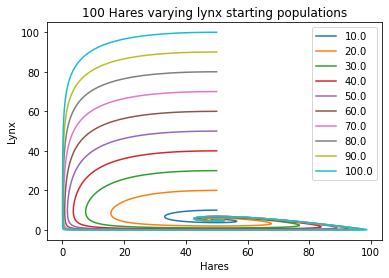

In [57]:
K_value = 100.0

method = RK2()
ode = LoktaVolterra(K_value)
integrator = Integrator(ode, method)


import matplotlib.pyplot as plt
h = 100.
l = 10.
l_array = [10., 20., 30., 40., 50., 60., 70., 80., 90., 100.]
t_0 = 0.0
t_end = 1000.0
dt = 0.1
for l_value in l_array:
    t,u = integrator.integrate([t_0,t_end],dt,np.array([h,l_value]))

    plt.plot(u[:,0], u[:,1], label=str(l_value))
plt.title('100 Hares varying lynx starting populations')
plt.xlabel('Hares')
plt.ylabel('Lynx')
plt.legend()
plt.show()



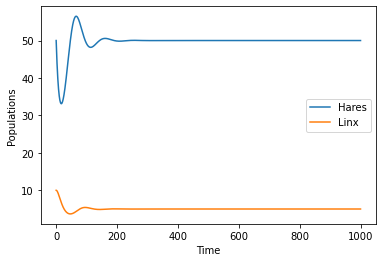

In [58]:
import matplotlib.pyplot as plt

t,u = integrator.integrate([t_0,t_end],dt,np.array([h,l]))

plt.plot(t,u[:,0], label='Hares')
plt.plot(t,u[:,1], label='Linx')
plt.xlabel('Time')
plt.ylabel('Populations')
plt.legend()
plt.show()
